# Klasifikasi

In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.model_selection import train_test_split
import joblib

In [3]:
# load Denpasar Weather Data
df = pd.read_csv("C:/Users/ITD-STU/Implementasi_TA/Dataset/denpasardata.csv")

# Visualisasi Denpasar

In [4]:
print(df.tail())

                 Waktu  Suhu  TekananUdara  Kelembapan  KecepatanAngin  \
264919  1/7/2020 19:00  27.0        1007.0          94             4.1   
264920  1/7/2020 20:00  27.0        1007.0          94             5.7   
264921  1/7/2020 21:00  28.0        1007.0          83             6.7   
264922  1/7/2020 22:00  28.0        1007.0          83             6.2   
264923  1/7/2020 23:00  28.0        1008.0          83             5.7   

          Cuaca  
264919    Cerah  
264920    Cerah  
264921    Cerah  
264922  Berawan  
264923  Berawan  


In [5]:
df['Cuaca'].value_counts()

Berawan    187180
Cerah       41605
Hujan       36139
Name: Cuaca, dtype: int64

In [6]:
df['Cuaca'].count()

264924

In [7]:
pd.value_counts(df['Cuaca']).plot.bar()

In [8]:
suhu = df['Suhu']
max = suhu.max()
min = suhu.min()
print(suhu.mean())
print(max)
print(min)

27.273335673626665
39.0
3.0


In [9]:
kelembapan = df['Kelembapan']
max_kel = kelembapan.max()
min_kel = kelembapan.min()
print(kelembapan.mean())
print(max_kel)
print(min_kel)

80.84499705575939
100
14


In [10]:
tudara = df['TekananUdara']
max_tudara = tudara.max()
min_tudara = tudara.min()
print(tudara.mean())
print(max_tudara)
print(min_tudara)

1010.0329188744922
1023.2
998.4


In [11]:
kangin = df['KecepatanAngin']
max_kangin = kangin.max()
min_kangin = kangin.min()
print(kangin.mean())
print(max_kangin)
print(min_kangin)

3.6123935921143886
31.9
0.01


# Handling Imbalaced Data

In [12]:
#class count
count_berawan, count_cerah, count_hujan = df.Cuaca.value_counts()

In [13]:
#Class
df_berawan = df[df['Cuaca'] == 'Berawan']
df_cerah = df[df['Cuaca'] == 'Cerah']
df_hujan = df[df['Cuaca'] == 'Hujan']

Random over-sampling:
Cerah      187180
Hujan      187180
Berawan    187180
Name: Cuaca, dtype: int64


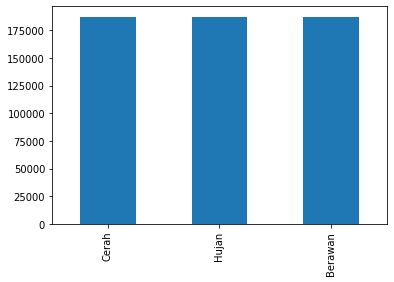

In [14]:
#random over-sampling
df_hujan_over = df_hujan.sample(count_berawan, replace=True)
df_cerah_over = df_cerah.sample(count_berawan, replace=True)

df_test_over = pd.concat([df_hujan_over, df_cerah_over, df_berawan], axis=0)

print('Random over-sampling:')
print(df_test_over.Cuaca.value_counts())

df_test_over.Cuaca.value_counts().plot(kind='bar')

# Model Naive Bayes

In [15]:
# Select independent and dependent variable
X = df[["Suhu", "TekananUdara", "Kelembapan", "KecepatanAngin"]]
y = df["Cuaca"]

In [16]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [17]:
# Instantiate the model
classifier = GaussianNB()

In [18]:
# Fit the model
classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
pred = classifier.predict(X_test)
pred = pd.DataFrame(pred)
pred.rename(columns = {0: 'Cuaca'}, inplace = True)

In [20]:
#evaluating model using confusion matrix
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
cm

              precision    recall  f1-score   support

     Berawan       0.74      0.91      0.82     56171
       Cerah       0.18      0.00      0.00     12546
       Hujan       0.40      0.38      0.39     10761

    accuracy                           0.70     79478
   macro avg       0.44      0.43      0.40     79478
weighted avg       0.61      0.70      0.63     79478



array([[51226,    20,  4925],
       [11163,     5,  1378],
       [ 6625,     3,  4133]], dtype=int64)

In [21]:
# Make pickle file of our model
filename = 'C:/Users/ITD-STU/Implementasi_TA/modelKlasifikasi.pkl'
pickle.dump(classifier, open(filename, "wb"))

# Feature importance

In [22]:
from sklearn.inspection import permutation_importance
import numpy as np

In [23]:
imps = permutation_importance(classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

Feature:0, Score: 0.00033
Feature:1, Score: 0.01062
Feature:2, Score: 0.00195
Feature:3, Score: 0.00836


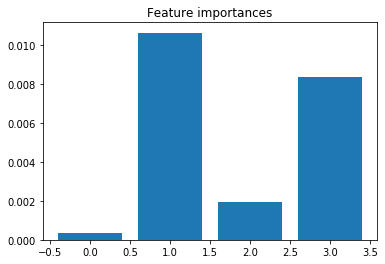

In [24]:
import matplotlib.pyplot as plt
for i,v in enumerate(importances):
    print('Feature:%0d, Score: %.5f' % (i,v))

# plot feature importance
plt.title("Feature importances")
plt.bar([x for x in range(len(importances))], importances)
plt.show()

# Sampel Data Alat

In [25]:
# Load test dataset
final_predict2 = pd.read_csv("C:/Users/ITD-STU/Implementasi_TA/Dataset/processData.csv")
final_predict = final_predict2.drop(['Waktu', 'Unnamed: 0', 'NO.'], axis=1)
final_predict

,Suhu,Kelembapan,TekananUdara,KecepatanAngin
0,22.7,75,1016.1,0.0
1,22.7,75,1016.1,0.0
2,22.9,75,1016.0,0.0
3,22.9,75,1015.9,0.0
4,23.0,75,1016.1,0.0
5,23.0,75,1016.3,0.0
6,22.9,74,1016.0,0.0
7,22.7,74,1015.8,0.0
8,22.6,74,1015.7,0.0
9,22.4,78,1015.5,0.0


In [26]:
# Load model from disk and use it to make new predictions
model = joblib.load("C:/Users/ITD-STU/Implementasi_TA/modelKlasifikasi.pkl")

In [27]:
#menampilkan nilai prediksi
X_train = final_predict
pred = model.predict(X_train)
pred = pd.DataFrame(pred)
pred.rename(columns = {0: 'Cuaca'}, inplace = True)

In [28]:
df = pd.read_csv("C:/Users/ITD-STU/Implementasi_TA/Dataset/dokumen.csv")

In [29]:
df

,Unnamed: 0,Unnamed: 0.1,NO.,Waktu,Suhu,Kelembapan,TekananUdara,KecepatanAngin,Cuaca
0,0,0,1,08/01/2021 22:00:00,22.7,75,1016.1,0.0,Cerah
1,1,1,2,08/01/2021 23:00:00,22.7,75,1016.1,0.0,Cerah
2,2,2,3,09/01/2021 00:00:00,22.9,75,1016.0,0.0,Cerah
3,3,3,4,09/01/2021 01:00:00,22.9,75,1015.9,0.0,Cerah
4,4,4,5,09/01/2021 02:00:00,23.0,75,1016.1,0.0,Cerah
5,5,5,6,09/01/2021 03:00:00,23.0,75,1016.3,0.0,Cerah
6,6,6,7,09/01/2021 04:00:00,22.9,74,1016.0,0.0,Cerah
7,7,7,8,09/01/2021 05:00:00,22.7,74,1015.8,0.0,Cerah
8,8,8,9,09/01/2021 06:00:00,22.6,74,1015.7,0.0,Cerah
9,9,9,10,09/01/2021 07:00:00,22.4,78,1015.5,0.0,Cerah


In [30]:
df['Cuaca'].count()

1943

In [31]:
df['Cuaca'].value_counts()

Hujan      887
Berawan    610
Cerah      446
Name: Cuaca, dtype: int64

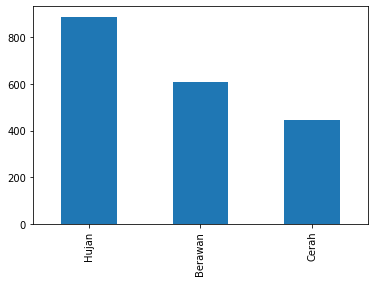

In [32]:
pd.value_counts(df['Cuaca']).plot.bar()

In [33]:
suhu = df['Suhu']
max = suhu.max()
min = suhu.min()
print(suhu.mean())
print(max)
print(min)

22.505198147195042
30.7
18.1


In [34]:
kelembapan = df['Kelembapan']
max_kel = kelembapan.max()
min_kel = kelembapan.min()
print(kelembapan.mean())
print(max_kel)
print(min_kel)

81.31755018013381
99
40


In [35]:
tudara = df['TekananUdara']
max_tudara = tudara.max()
min_tudara = tudara.min()
print(tudara.mean())
print(max_tudara)
print(min_tudara)

1015.7881111682962
1018.4
1012.1


In [36]:
kangin = df['KecepatanAngin']
max_kangin = kangin.max()
min_kangin = kangin.min()
print(kangin.mean())
print(max_kangin)
print(min_kangin)

2.289243437982477
14.5
0.0


# Data Klasifikasi Alat

In [37]:
#Data Alat sebelum klasifikasi
import pandas as pd
import requests
import json

url = "https://heroku-tugas-akhir.herokuapp.com/api/weather"
response = requests.get(url)
JSONContent = requests.get(url).json()
content = json.dumps(JSONContent, indent = 4, sort_keys=True)
print(content)

[
    {
        "created_at": "2021-04-29T14:00:13.000000Z",
        "date_hour": "2021-04-29 21:00:00",
        "id": 48,
        "kec_angin": "2.66",
        "kelembapan": "94",
        "suhu": "21.6",
        "tekanan_udara": "910.3",
        "updated_at": "2021-04-29T14:00:13.000000Z"
    },
    {
        "created_at": "2021-04-29T15:00:11.000000Z",
        "date_hour": "2021-04-29 22:00:00",
        "id": 49,
        "kec_angin": "0",
        "kelembapan": "94",
        "suhu": "21.2",
        "tekanan_udara": "910.8",
        "updated_at": "2021-04-29T15:00:11.000000Z"
    },
    {
        "created_at": "2021-04-29T16:00:16.000000Z",
        "date_hour": "2021-04-29 23:00:00",
        "id": 50,
        "kec_angin": "0",
        "kelembapan": "99",
        "suhu": "20.6",
        "tekanan_udara": "910.7",
        "updated_at": "2021-04-29T16:00:16.000000Z"
    },
    {
        "created_at": "2021-04-29T17:00:16.000000Z",
        "date_hour": "2021-04-30 00:00:00",
        "id": 51

In [38]:
#Data Alat sesudah klasifikasi
import pandas as pd
import requests
import json

url = "https://model-ta.herokuapp.com/api/modelAPI"
response = requests.get(url)
JSONContent = requests.get(url).json()
content = json.dumps(JSONContent, indent = 4, sort_keys=True)
print(content)

[
    {
        "created_at": "2021-06-21T12:00:43.000000Z",
        "cuaca": "Berawan",
        "date_hour": "2021-06-19 13:00:00",
        "id": 1,
        "kec_angin": "5.32",
        "kelembapan": "59",
        "suhu": "29.2",
        "tekanan_udara": "908.9",
        "updated_at": "2021-06-21T12:00:43.000000Z"
    },
    {
        "created_at": "2021-06-24T03:11:16.000000Z",
        "cuaca": "Berawan",
        "date_hour": "2021-06-24 10:11:00",
        "id": 7,
        "kec_angin": "2.66",
        "kelembapan": "61",
        "suhu": "28.3",
        "tekanan_udara": "909.6",
        "updated_at": "2021-06-24T03:11:16.000000Z"
    },
    {
        "created_at": "2021-06-24T03:13:03.000000Z",
        "cuaca": "Berawan",
        "date_hour": "2021-06-24 10:13:00",
        "id": 8,
        "kec_angin": "1.14",
        "kelembapan": "60",
        "suhu": "28.4",
        "tekanan_udara": "909.5",
        "updated_at": "2021-06-24T03:13:03.000000Z"
    },
    {
        "created_at": "202

In [39]:
# receiving results in a dictionary
dic = response.json()

In [40]:
# convert dictionary to dataframe
data = pd.DataFrame.from_dict(dic)

In [41]:
# join columnn
new_data = pd.concat([data['id'], data['date_hour'], data['suhu'],  data['tekanan_udara'],  data['kelembapan'], data['kec_angin'], data['cuaca']], axis=1)

In [42]:
#removing the default index
new_data.reset_index(drop=True, inplace=True)

In [43]:
# saving new_data into a csv file
dataset = new_data.to_csv('C:/Users/ITD-STU/Implementasi_TA/Dataset/klasifikasiAPI.csv')

In [44]:
# load Data
dataset = pd.read_csv('C:/Users/ITD-STU/Implementasi_TA/Dataset/klasifikasiAPI.csv')

In [45]:
# drop not used column
new_dataset = dataset.drop(['Unnamed: 0'], axis=1)
new_dataset.tail(1)

,id,date_hour,suhu,tekanan_udara,kelembapan,kec_angin,cuaca
143,150,2021-07-07 09:00:00,23.8,908.3,71,1.14,Cerah


In [46]:
#rename column name
fix_dataset = new_dataset.rename(columns={'id':'No.','date_hour':'Waktu','suhu': 'Suhu','kelembapan':'Kelembapan',
                                     'tekanan_udara': 'TekananUdara', 'kec_angin': 'KecepatanAngin'})
fix_dataset.tail(1)

,No.,Waktu,Suhu,TekananUdara,Kelembapan,KecepatanAngin,cuaca
143,150,2021-07-07 09:00:00,23.8,908.3,71,1.14,Cerah


In [47]:
df = pd.DataFrame(fix_dataset)
#save new csv file after processing data
df.to_csv("C:\\Users\\ITD-STU\\Implementasi_TA\\Dataset\\klasifikasiDataAPI.csv")

# Moving Average

In [48]:
# load Data
dataAPI = pd.read_csv('C:/Users/ITD-STU/Implementasi_TA/Dataset/klasifikasiDataAPI.csv')
dataAPI = pd.DataFrame(dataAPI)

In [49]:
#discard uneded data
dataset = dataAPI.drop(['Unnamed: 0'], axis=1)
dataset.tail(5)

,No.,Waktu,Suhu,TekananUdara,Kelembapan,KecepatanAngin,cuaca
139,146,2021-07-07 05:00:00,19.2,906.8,99,0.00,Cerah
140,147,2021-07-07 06:00:00,19.5,906.9,90,0.00,Cerah
141,148,2021-07-07 07:00:00,19.9,907.4,89,0.00,Cerah
142,149,2021-07-07 08:00:00,21.7,907.8,83,0.00,Cerah
143,150,2021-07-07 09:00:00,23.8,908.3,71,1.14,Cerah


In [50]:
data_Suhu = pd.DataFrame(dataset.Suhu)
data_Kelembapan = pd.DataFrame(dataset.Kelembapan)
data_Tekanan = pd.DataFrame(dataset.TekananUdara)
data_KecepatanAngin = pd.DataFrame(dataset.KecepatanAngin)

In [51]:
df = pd.DataFrame(dataset)
#Moving Average calculation for next 1 hour
df['MA_Suhu']=df['Suhu'].rolling(4).mean()
df['MA_Tekanan udara']=df['TekananUdara'].rolling(4).mean()
df['MA_Kelembapan']=df['Kelembapan'].rolling(4).mean()
df['MA_Kecepatan Angin']=df['KecepatanAngin'].rolling(4).mean()
df.tail(1)

,No.,Waktu,Suhu,TekananUdara,Kelembapan,KecepatanAngin,cuaca,MA_Suhu,MA_Tekanan udara,MA_Kelembapan,MA_Kecepatan Angin
143,150,2021-07-07 09:00:00,23.8,908.3,71,1.14,Cerah,21.225,907.6,83.25,0.285


In [52]:
df.to_csv("C:\\Users\\ITD-STU\\Implementasi_TA\\Dataset\\prediksi1JamAPI.csv")

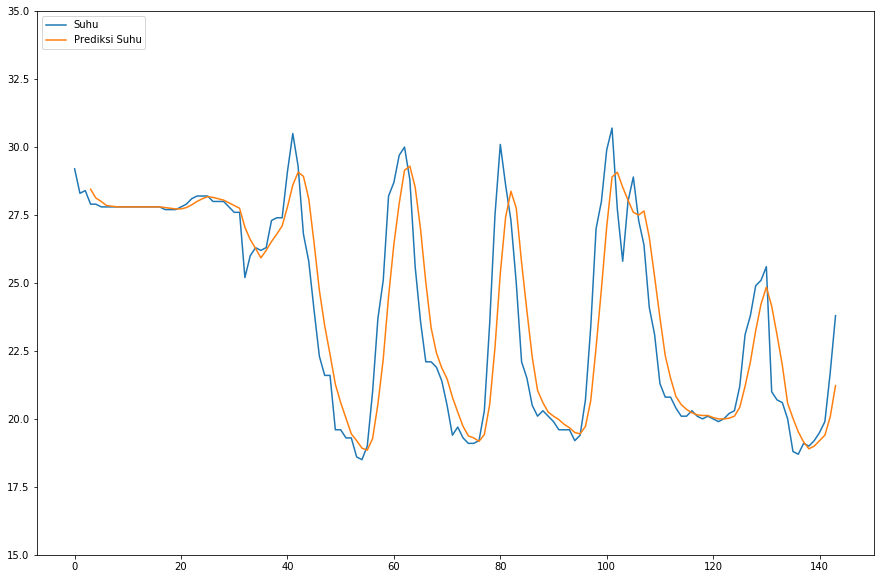

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
#Plot data and moving average suhu
plt.figure(figsize=(15,10))
plt.ylim(15,35)
#plt.grid(True)
plt.plot(df['Suhu'],label='Suhu')
plt.plot(df['MA_Suhu'],label='Prediksi Suhu')
plt.legend(loc=2)

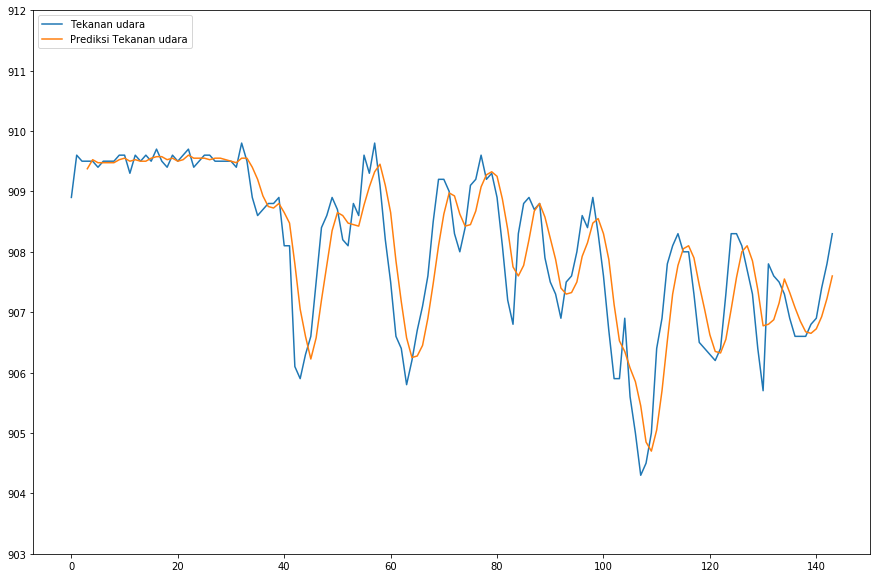

In [54]:
#Plot data and moving average tekanan udara
plt.figure(figsize=(15,10))
plt.ylim(903,912)
#plt.grid(True)
plt.plot(df['TekananUdara'],label='Tekanan udara')
plt.plot(df['MA_Tekanan udara'],label='Prediksi Tekanan udara')
plt.legend(loc=2)

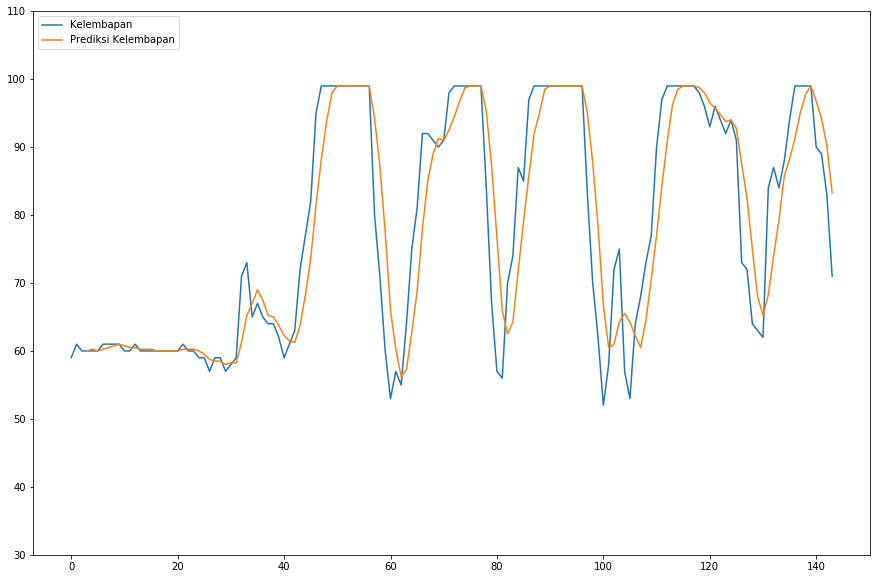

In [55]:
#Plot data and moving average kelembapan
plt.figure(figsize=(15,10))
plt.ylim(30,110)
#plt.grid(True)
plt.plot(df['Kelembapan'],label='Kelembapan')
plt.plot(df['MA_Kelembapan'],label='Prediksi Kelembapan')
plt.legend(loc=2)

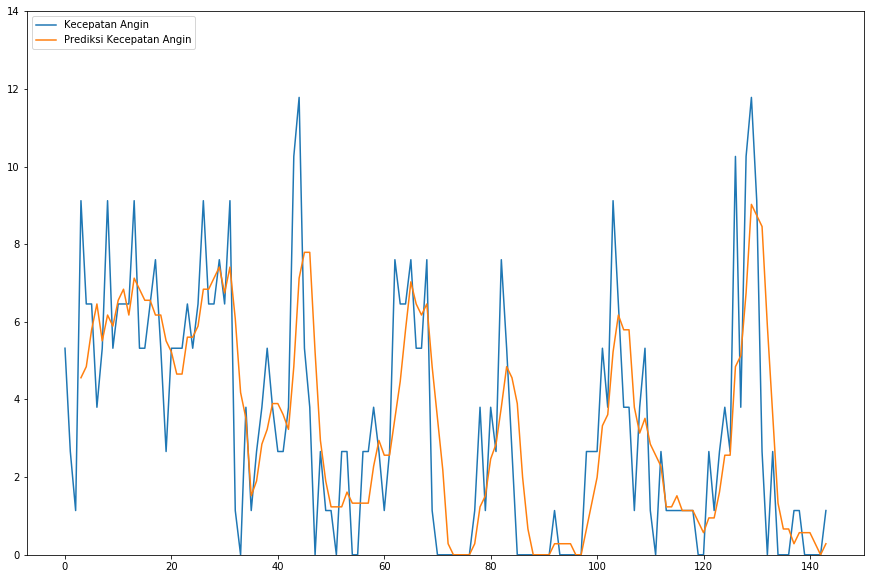

In [56]:
#Plot data and moving average KecepatanAngin
plt.figure(figsize=(15,10))
plt.ylim(0,14)
#plt.grid(True)
plt.plot(df['KecepatanAngin'],label='Kecepatan Angin')
plt.plot(df['MA_Kecepatan Angin'],label='Prediksi Kecepatan Angin')
plt.legend(loc=2)

In [57]:
from numpy import mean
from matplotlib import pyplot
/# prepare situation
X = dataset['Suhu']
window = 4
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

In [58]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE:' ,error)

Test MSE: 5.643107142857142


# Prediksi naive bayes

In [59]:
#Data Alat Prediksi
import pandas as pd
import requests
import json

url = "https://model-ta.herokuapp.com/api/Prediction"
response = requests.get(url)
JSONContent = requests.get(url).json()
content = json.dumps(JSONContent, indent = 4, sort_keys=True)
print(content)

[
    {
        "created_at": "2021-06-26T05:44:09.000000Z",
        "cuacaPrediction": "Berawan",
        "date_hour": "2021-06-26 12:44:00",
        "id": 3,
        "kec_anginPrediction": "1.9",
        "kelembapanPrediction": "67.5",
        "suhuPrediction": "26.2",
        "tekanan_udaraPrediction": "908.925",
        "updated_at": "2021-06-26T05:44:09.000000Z"
    },
    {
        "created_at": "2021-06-26T05:45:06.000000Z",
        "cuacaPrediction": "Berawan",
        "date_hour": "2021-06-26 12:45:00",
        "id": 4,
        "kec_anginPrediction": "2.85",
        "kelembapanPrediction": "65.25",
        "suhuPrediction": "26.525",
        "tekanan_udaraPrediction": "908.75",
        "updated_at": "2021-06-26T05:45:06.000000Z"
    },
    {
        "created_at": "2021-06-26T05:46:07.000000Z",
        "cuacaPrediction": "Berawan",
        "date_hour": "2021-06-26 12:46:00",
        "id": 5,
        "kec_anginPrediction": "3.23",
        "kelembapanPrediction": "65",
        "s

In [60]:
# receiving results in a dictionary
dic = response.json()

In [61]:
# convert dictionary to dataframe
data = pd.DataFrame.from_dict(dic)

In [62]:
# join columnn
new_data = pd.concat([data['id'], data['date_hour'], data['suhuPrediction'],  data['tekanan_udaraPrediction'],  data['kelembapanPrediction'], data['kec_anginPrediction'], data['cuacaPrediction']], axis=1)

In [63]:
#removing the default index
new_data.reset_index(drop=True, inplace=True)

In [64]:
print(new_data)

      id            date_hour suhuPrediction tekanan_udaraPrediction  \
0      3  2021-06-26 12:44:00           26.2                 908.925   
1      4  2021-06-26 12:45:00         26.525                  908.75   
2      5  2021-06-26 12:46:00           26.8                 908.725   
3      6  2021-06-27 14:27:00           27.1                   908.8   
4      7  2021-06-27 14:51:00           28.6                 908.475   
5      8  2021-07-01 15:00:00         29.075                   907.8   
6      9  2021-07-01 16:00:00         28.925                  907.05   
7     10  2021-07-01 17:00:00           28.1                   906.6   
8     11  2021-07-01 18:00:00         26.475                 906.225   
9     12  2021-07-01 19:00:00         24.725                 906.575   
10    13  2021-07-01 20:00:00         23.425                   907.2   
11    14  2021-07-01 21:00:00         22.375                 907.775   
12    15  2021-07-02 02:00:00         21.275                  90

In [65]:
# saving new_data into a csv file
dataset = new_data.to_csv('C:/Users/ITD-STU/Implementasi_TA/Dataset/prediksiAPI.csv')

In [66]:
# load Data
dataset = pd.read_csv('C:/Users/ITD-STU/Implementasi_TA/Dataset/prediksiAPI.csv')
dataset.head(5)

,Unnamed: 0,id,date_hour,suhuPrediction,tekanan_udaraPrediction,kelembapanPrediction,kec_anginPrediction,cuacaPrediction
0,0,3,2021-06-26 12:44:00,26.200,908.925,67.50,1.900,Berawan
1,1,4,2021-06-26 12:45:00,26.525,908.750,65.25,2.850,Berawan
2,2,5,2021-06-26 12:46:00,26.800,908.725,65.00,3.230,Berawan
3,3,6,2021-06-27 14:27:00,27.100,908.800,63.75,3.895,Berawan
4,4,7,2021-06-27 14:51:00,28.600,908.475,61.50,3.610,Berawan


In [67]:
# drop not used column
new_dataset = dataset.drop(['Unnamed: 0'], axis=1)
new_dataset.tail(1)

,id,date_hour,suhuPrediction,tekanan_udaraPrediction,kelembapanPrediction,kec_anginPrediction,cuacaPrediction
106,110,2021-07-07 09:00:00,21.225,907.6,83.25,0.285,Cerah


In [68]:
#rename column name
fix_dataset = new_dataset.rename(columns={'id':'No.','date_hour':'Waktu','suhuPrediction': 'Prediksi Suhu','kelembapanPrediction':'Prediksi Kelembapan',
                                     'tekanan_udaraPrediction': 'Prediksi TekananUdara', 'kec_anginPrediction': 'Prediksi KecepatanAngin', 'cuacaPrediction':'Prediksi Cuaca'})
fix_dataset.tail(1)

,No.,Waktu,Prediksi Suhu,Prediksi TekananUdara,Prediksi Kelembapan,Prediksi KecepatanAngin,Prediksi Cuaca
106,110,2021-07-07 09:00:00,21.225,907.6,83.25,0.285,Cerah


In [69]:
df = pd.DataFrame(fix_dataset)
#save new csv file after processing data
df.to_csv("C:\\Users\\ITD-STU\\Implementasi_TA\\Dataset\\prediksiDataAPI.csv")